# Set up the script

In [1]:
%matplotlib notebook
%pylab


Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import skimage.io
from skimage import feature
from skimage import color
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)

# import the game map

In [23]:
erangel_gray = color.rgb2gray(imread('resources/erangelmapSmallgray.jpg'))

<IPython.core.display.Javascript object>


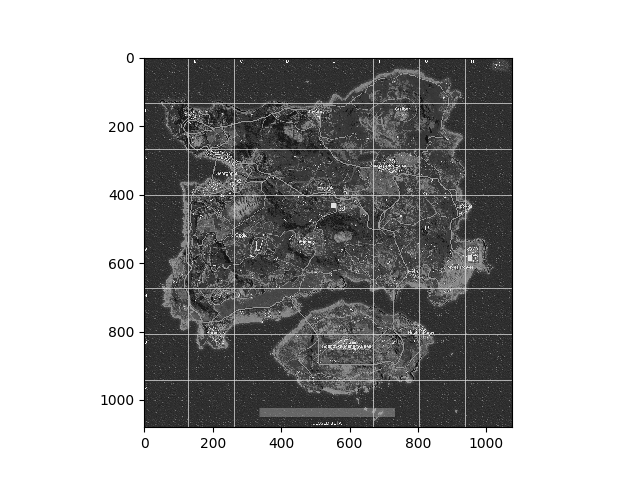

In [24]:
figure();
imshow(erangel_gray,cmap='gray')

## extract the grid

In [40]:
edges = feature.canny(erangel_gray,sigma=1)
lines = probabilistic_hough_line(edges, threshold=10, line_length=80,
                                 line_gap=3)
print size(lines)
hist(lines)

452


([array([ 1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.]),
  array([ 0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
  array([ 0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  1.]),
  array([ 0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  1.]),
  array([ 0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  1.]),
  array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  1.]),
  array([ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  1.]),
  array([ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.]),
  array([ 0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  1.]),
  array([ 1.,  0.,  1., 

In [26]:
hogvec, hogim = feature.hog(erangel_gray,visualise=True)

<IPython.core.display.Javascript object>


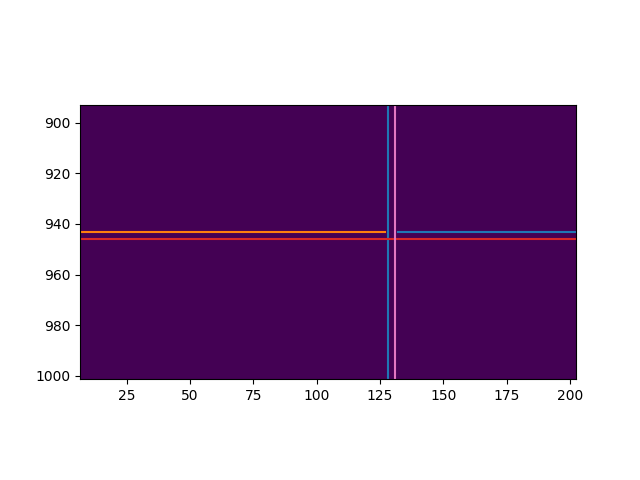

In [33]:
figure();
imshow(edges * 0)
for line in lines:
    p0, p1 = line
    plot((p0[0], p1[0]), (p0[1], p1[1]))

# Import a few sample video frames

In [17]:
frame1=imread('resources/frames/sampleGPV2/00011.png')

<IPython.core.display.Javascript object>


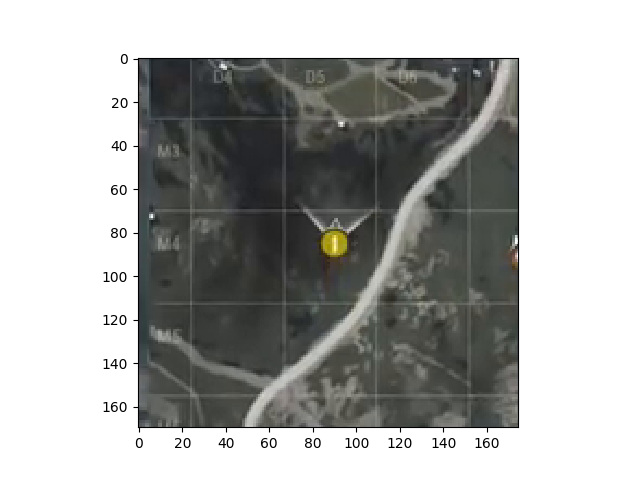

In [49]:
figure(); 
frame1 = frame1[530:-20,1080:-25]
imshow(frame1)

In [59]:
edges2 = feature.canny(color.rgb2gray(frame1),sigma=1)
lines2 = probabilistic_hough_line(edges2, threshold=10, line_length=20,
                                 line_gap=3)

<IPython.core.display.Javascript object>


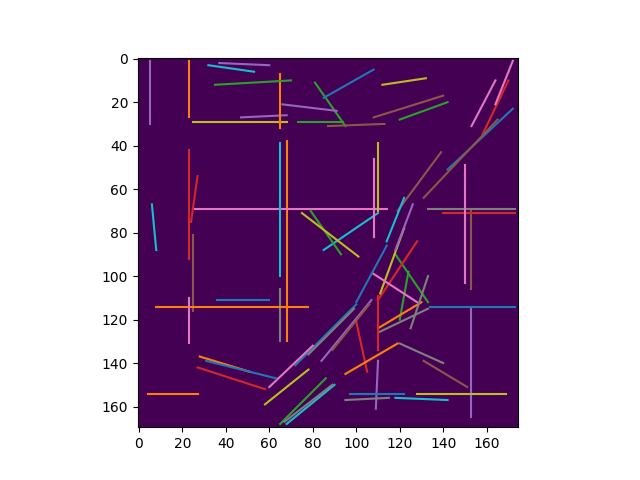

In [60]:
figure();
imshow(edges2 * 0)
for line in lines2:
    p0, p1 = line
    plot((p0[0], p1[0]), (p0[1], p1[1]))